In [1]:
import pickle

with open('aligned_paragraph_dataset.pickle', 'rb') as fp:
  aligned_paragraph_dataset = pickle.load(fp)

with open('source_paragraph_dataset.pickle', 'rb') as fp:
  source_paragraph_dataset = pickle.load(fp)

In [2]:
len(source_paragraph_dataset.keys())

9

In [2]:
from nltk.tokenize import sent_tokenize
import pandas as pd
from thefuzz import fuzz
import random

## English Idioms in Translations

In [3]:
en_df = pd.read_json("/home/kkatsy/idioms/magpie-corpus/MAGPIE_unfiltered.jsonl", lines=True)
en_df.head()

confidence                                            context document_id  \
0         1.0  [, , One can not come to terms with the past ,...    p39d1118   
1         1.0  [And there may be one or two other things we w...         J97   
2         1.0  [It was the first thing I asked.’, Lindsey nod...         JXW   
3         1.0  [When I took these two guitars into the studio...         C9M   
4         1.0  [Now , generally speaking wi I I I 've act wha...         JT1   

                genre  id               idiom  judgment_count label  \
0                 PMB   0  come to terms with               3     i   
1           S meeting   1       call it a day               3     i   
2        W fict prose   2     out of the blue               3     i   
3          W pop lore   3           full tilt               5     i   
4  S lect soc science   4            on paper               3     l   

                                  label_distribution  \
0  {'?': 0.0, 'f': 0.0, 'i': 1.0, 'l': 0.0, 'o': ...   
1  {'?': 0.0, 'f': 0.0, 'i': 1.0, 'l': 0.0, 'o': ...   
2  {'?': 0.0, 'f': 0.0, 'i': 1.0, 'l': 0.0, 'o': ...   
3  {'?': 0.0, 'f': 0.0, 'i': 1.0, 'l': 0.0, 'o': ...   
4  {'?': 0.0, 'f': 0.0, 'i': 0.0, 'l': 1.0, 'o': ...   

  non_standard_usage_explanations                                   offsets  \
0                              []  [[12, 16], [17, 19], [20, 25], [26, 30]]   
1                              []             [[9, 13], [14, 16], [19, 22]]   
2                              []            [[77, 80], [81, 83], [88, 92]]   
3                              []                  [[234, 238], [239, 243]]   
4                              []                  [[102, 104], [115, 120]]   

   sentence_no     split     variant_type  
0            0  training        identical  
1          470  training        identical  
2         1202  training        identical  
3         1117  training        identical  
4          291  training  insertion-other

In [4]:
en_idioms = list(en_df["idiom"].astype('str'))
print(en_idioms[:10])

print('Num idioms: ', len(en_idioms))

['come to terms with', 'call it a day', 'out of the blue', 'full tilt', 'on paper', 'to the letter', 'strike a chord', 'muddy the waters', 'do the honours', 'high and low']
Num idioms:  56622


In [6]:
! pip install thefuzz

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/kkatsy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from thefuzz import fuzz
name = "Kurtis Pykes"
full_name = "hello my name is Kurtis K D Pykes and i like potatoes"

print(f"Token sort ratio similarity score: {fuzz.partial_ratio(name, full_name)}")

Token sort ratio similarity score: 67


In [32]:
count = 0

for id in random.sample(en_idioms, 500):
    for book in sorted(list(source_paragraph_dataset.keys())):
        num_pars = len(source_paragraph_dataset[book])
        for i in range(num_pars):
            # id needs to be less than par
            translators = aligned_paragraph_dataset[book][i].keys()
            for t in translators:
                par = aligned_paragraph_dataset[book][i][t]
                sents = sent_tokenize(par)
                for s in sents:
                    if len(s) > 10 and len(id.split(' ')) > 0 and len(id) < len(s):
                        fuzzy = fuzz.partial_ratio(id, s)
                        if fuzzy > 95:
                            count +=1
                            print('Num ', count)
                            print('score: ', fuzzy)
                            print('idiom: ', id)
                            print('sent: ', s)
                            print('book: ', book, ', par idx: ', i)
                            print('translator: ', t, '\n')
    if count > 50:
        break

Num  1
score:  100
idiom:  under lock and key
sent:  I'm going to pick you up, put you under my arm, take you home and place you under lock and key!'
book:  CrimeAndPunishment , par idx:  1092
translator:  McDuff 

Num  2
score:  100
idiom:  under lock and key
sent:  Arkady Ivanovich got up, laughed, kissed his fiancée, patted her on the cheek, assured her he would be back soon and, noticing in her eyes not only a certain childish curiosity but also a very earnest, unspoken question, thought for a moment, gave her another kiss and as he did so experienced a pang of sincere regret within his soul that the gift would immediately be placed under lock and key for safekeeping by that wisest of mothers.
book:  CrimeAndPunishment , par idx:  3573
translator:  McDuff 

Num  3
score:  100
idiom:  under lock and key
sent:  The main thing was, however, that they should not tell anyone about all this, because heaven only knew what might happen then, and the money must be immediately placed under l

### Examples:

In [36]:
idx = 1274
book = 'TheIdiot'
idiom = 'on tenterhooks'
translator = 'Garnett'

target_keys = aligned_paragraph_dataset[book][idx]
source = source_paragraph_dataset[book][idx]

print('Source:')
print(source)
print('Translations:')
for t in target_keys:
    print(t, ': ', aligned_paragraph_dataset[book][idx][t])


Source:
Все устремили взгляды на Птицына, читавшего письмо. Общее любопытство получило новый и чрезвычайный толчок. Фердыщенку не сиделось; Рогожин смотрел в недоумении и в ужасном беспокойстве переводил взгляды то на князя, то на Птицына. Дарья Алексеевна в ожидании была как на иголках. Даже Лебедев не утерпел, вышел из своего угла, и, согнувшись в три погибели, стал заглядывать в письмо чрез плечо Птицына, с видом человека, опасающегося, что ему сейчас дадут за это колотушку.
Translations:
Garnett :  Everyone fixed their eyes on Paityn as he read the letter. The general curiosity had received a new and violent stimulus. Ferdyshtchenko could not keep still; Rogozhin looked on with amazement and great anxiety, turning his eyes from Myshkin to Paityn. Darya Alexeyevna seemed on tenterhooks of expectation. Even Lebedyev could not help coming out of his corner and bending himself into a triangle, peeped at the letter over Ptitsyn's shoulder with the air of aman expecting a  blow for doing

In [40]:
# idx = 3673
# book = 'Demons'
# idiom = 'under lock and key'
# translator = ''

# print('Source:')
# print(source)
# print('Translations:')
# for t in target_keys:
#     print(t, ': ', aligned_paragraph_dataset[book][idx][t])

In [41]:
# idx = 4956
# book = 'TheBrothersKaramazov'
# idiom = 'in light of'
# translator = ''

# print('Source:')
# print(source)
# print('Translations:')
# for t in target_keys:
#     print(t, ': ', aligned_paragraph_dataset[book][idx][t])

## Russian Idioms in Source Texts

In [8]:
with open('/home/kkatsy/idioms/ru_idioms.txt', "r") as fp:
    ru_id_lines = fp.readlines()

ru_idioms = [line.strip().lower() for line in ru_id_lines]

print(ru_idioms[:10])

print('Num idioms: ', len(ru_idioms))

['авось', 'ахиллесова пята', 'бабушка ещё надвое гадала', 'базарная баба', 'без всякой задней мысли', 'без году неделю', 'без задней мысли', 'без задних ног', 'без мыла влезать в душу', 'без оглядки']
Num idioms:  1651


In [20]:
count = 0
import random

for id in random.sample(ru_idioms, 500):
    for book in sorted(list(source_paragraph_dataset.keys())):
        num_pars = len(source_paragraph_dataset[book])
        for i in range(num_pars):
            # id needs to be less than par
            par = source_paragraph_dataset[book][i]
            sents = sent_tokenize(par)
            for s in sents:
                if len(s) > 10 and len(id.split(' ')) > 0 and len(id) < len(s):
                    fuzzy = fuzz.partial_ratio(id, s)
                    if fuzzy > 90:
                        count +=1
                        print('Num ', count)
                        print('score: ', fuzzy)
                        print('idiom: ', id)
                        print('sent: ', s)
                        print('book: ', book, ', par idx: ', i, '\n')
    if count > 50:
        break
            

Num  1
score:  100
idiom:  испокон века
sent:  У него нет достаточно земли, – ну, он и захватил чужую пустошь, то есть он рассчитывал, что она не нужна, и о ней хозяева <забыли>, а у нас, как нарочно, уже испокон века собираются крестьяне праздновать там Красную горку.
book:  DeadSouls , par idx:  1899 

Num  2
score:  92
idiom:  испокон века
sent:  Наконец, и главное, конечно для того, чтоб его, Смердякова, разбитого припадком, тотчас же перенесли из кухни, где он всегда отдельно ото всех ночевал и где имел свой особенный вход и выход, в другой конец флигеля, в комнатку Григория, к ним обоим за перегородку, в трех шагах от их собственной постели, как всегда это бывало, спокон века, чуть только его разбивала падучая, по распоряжениям барина и сердобольной Марфы Игнатьевны.
book:  TheBrothersKaramazov , par idx:  5105 

Num  3
score:  100
idiom:  на ногах
sent:  Николай Щербацкий, двоюродный брат Кити, в коротенькой жакетке и узких панталонах, сидел с коньками на ногах на скамейке и, ув

### Examples:

In [42]:
idx = 4133
book = 'TheIdiot'
idiom = 'вне себя'

target_keys = aligned_paragraph_dataset[book][idx]
source = source_paragraph_dataset[book][idx]

print('Source:')
print(source)
print('Translations:')
for t in target_keys:
    print(t, ': ', aligned_paragraph_dataset[book][idx][t])

Source:
Князь был решительно вне себя.
Translations:
Garnett :  Myshkin had completely lost control of himself.
McDuff :  The prince was well and truly beside himself.
PV :  The prince was decidedly beside himself.


In [43]:
idx = 3405
book = 'TheIdiot'
idiom = 'как снег на голову'

target_keys = aligned_paragraph_dataset[book][idx]
source = source_paragraph_dataset[book][idx]

print('Source:')
print(source)
print('Translations:')
for t in target_keys:
    print(t, ': ', aligned_paragraph_dataset[book][idx][t])

Source:
– Н-нет-с; денег я не давал-с, и он сам знает, что я и не дам-с, но ведь единственно в видах воздержания и исправления его. Теперь увязался со мной в Петербург; я в Петербург ведь еду-с, чтобы застать господина Фердыщенка по самым горячим следам, ибо наверно знаю, что он уже там-с. Генерал мой так и кипит-с; но подозреваю, что в Петербурге улизнет от меня, чтобы посетить капитаншу. Я, признаюсь, даже нарочно его от себя отпущу, как мы уже и условились по приезде тотчас же разойтись в разные стороны, чтоб удобнее изловить господина Фердыщенка. Так вот я его отпущу, а потом вдруг, как снег на голову, и застану его у капитанши, – собственно, чтоб его пристыдить, как семейного человека и как человека вообще говоря.
Translations:
Garnett :  "N-no; money I have not given him, and he knows himself that I won't give it him. But that's solely with a view to his elevation and reformation. Now he is insisting on coming to Petersburg with me. You see, I'm going to Petersburg to find Mr. Fe

In [45]:
idx = 571
book = 'CrimeAndPunishment'
idiom = 'на ногах'

target_keys = aligned_paragraph_dataset[book][idx]
source = source_paragraph_dataset[book][idx]

print('Source:')
print(source)
print('Translations:')
for t in target_keys:
    print(t, ': ', aligned_paragraph_dataset[book][idx][t])

Source:
– Он едва на ногах стоит, а ты… – заметил было Никодим Фомич.
Translations:
Katz :  "He can hardly stand, while you think. . ." remarked Nikodim Fomich.
Garnett :  "He can scarcely stand upright. And you…" Nikodim Fomitch was beginning.
McDuff :  'He can hardly stay standing, yet you ...' Nikodim Fomich began to protest.
PV :  "He can barely stand on his feet, and you..." Nikodim Fomich began.


## Dostoevsky's Literary Idioms

In [9]:
with open('/home/kkatsy/idioms/dostoevsky_idioms.txt', "r") as fp:
    ru_id_lines = fp.readlines()

dost_idioms = [line.strip().lower() for line in ru_id_lines]

print(dost_idioms[:5])

print('Num idioms: ', len(dost_idioms))

['бабушкин сoн', 'бедность не порок', 'без гроша', 'без задних ног', 'без зазрения совести']
Num idioms:  508


In [18]:
count = 0
for id in dost_idioms:
    for book in sorted(list(source_paragraph_dataset.keys())):
        num_pars = len(source_paragraph_dataset[book])
        for i in range(num_pars):
            # id needs to be less than par
            par = source_paragraph_dataset[book][i]
            sents = sent_tokenize(par)
            for s in sents:
                if len(s) > 10 and len(id.split(' ')) > 0 and len(id) < len(s):
                    fuzzy = fuzz.partial_ratio(id, s.lower())
                    if fuzzy > 90:
                        count +=1
                        print('Num ', count)
                        print('score: ', fuzzy)
                        print('idiom: ', id)
                        print('sent: ', s)
                        print('book: ', book, ', par idx: ', i, '\n')

Num  1
score:  92
idiom:  бабушкин сoн
sent:  Ну, конечно, бабушкин сон рассказывает, врет, как лошадь, потому я этого Душкина знаю, сам он закладчик и краденое прячет, и тридцатирублевую вещь не для того, чтоб «преставить», у Миколая подтибрил.
book:  CrimeAndPunishment , par idx:  815 

Num  2
score:  100
idiom:  бедность не порок
sent:  – Милостивый государь, – начал он почти с торжественностию, – бедность не порок, это истина.
book:  CrimeAndPunishment , par idx:  60 

Num  3
score:  100
idiom:  бедность не порок
sent:  – Бедность не порок, дружище, ну да уж что!
book:  CrimeAndPunishment , par idx:  528 

Num  4
score:  100
idiom:  бедность не порок
sent:  Будьте благородным человеком, твердым в несчастиях; помните, что бедность не порок.
book:  PoorFolk , par idx:  270 

Num  5
score:  100
idiom:  без гроша
sent:  Прислала бы и больше, но боюсь за наши расходы дорожные; хотя Петр Петрович был так добр, что взял на себя часть издержек по нашему проезду в столицу, а именно сам вызв

KeyboardInterrupt: 

### Examples:

In [46]:
idx = 2519
book = 'CrimeAndPunishment'
idiom = 'время терпят'

target_keys = aligned_paragraph_dataset[book][idx]
source = source_paragraph_dataset[book][idx]

print('Source:')
print(source)
print('Translations:')
for t in target_keys:
    print(t, ': ', aligned_paragraph_dataset[book][idx][t])

Source:
– Да-да-да! Не беспокойтесь! Время терпит, время терпит-с, – бормотал Порфирий Петрович, похаживая взад и вперед около стола, но как-то без всякой цели, как бы кидаясь то к окну, то к бюро, то опять к столу, то избегая подозрительного взгляда Раскольникова, то вдруг сам останавливаясь на месте и глядя на него прямо в упор. Чрезвычайно странною казалась при этом его маленькая, толстенькая и круглая фигурка, как будто мячик, катавшийся в разные стороны и тотчас отскакивавший от всех стен и углов.
Translations:
Katz :  "Yes, yes, yes! Don't worry! There's no hurry, no hurry at all, sir," muttered Porfiry Petrovich, pacing back and forth around the table, but seemingly without any objective, as if hastening first to the window, then to the bureau, then back to the table, first avoiding Raskolnikov's suspicious glance, then suddenly stopping in one place and staring directly at him. His small, plump, round figure, like a ball rolling in various directions and bouncing off all the wa

In [48]:
idx = 2936
book = 'TheIdiot'
idiom = 'во что бы то ни стало'

target_keys = aligned_paragraph_dataset[book][idx]
source = source_paragraph_dataset[book][idx]

print('Source:')
print(source)
print('Translations:')
for t in target_keys:
    print(t, ': ', aligned_paragraph_dataset[book][idx][t])

Source:
«Идея о том (продолжал он читать), что не стоит жить несколько недель, стала одолевать меня настоящим образом, я думаю, с месяц назад, когда мне оставалось жить еще четыре недели, но совершенно овладела мной только три дня назад, когда я возвратился с того вечера в Павловске. Первый момент полного, непосредственного проникновения этою мыслью произошел на террасе у князя, именно в то самое мгновение, когда я вздумал сделать последнюю пробу жизни, хотел видеть людей и деревья (пусть это я сам говорил), горячился, настаивал на праве Бурдовского, „моего ближнего“, и мечтал, что все они вдруг растопырят руки и примут меня в свои объятия, и попросят у меня в чем-то прощения, а я у них; одним словом, я кончил как бездарный дурак. И вот в эти-то часы и вспыхнуло во мне „последнее убеждение“. Удивляюсь теперь, каким образом я мог жить целые шесть месяцев без этого „убеждения“! Я положительно знал, что у меня чахотка, и неизлечимая; я не обманывал себя и понимал дело ясно. Но чем яснее я

In [49]:
idx = 1040
book = 'Demons'
idiom = 'во все глаза'

target_keys = aligned_paragraph_dataset[book][idx]
source = source_paragraph_dataset[book][idx]

print('Source:')
print(source)
print('Translations:')
for t in target_keys:
    print(t, ': ', aligned_paragraph_dataset[book][idx][t])

Source:
– Я… я думала, так надо, – пролепетала она, смотря во все глаза на Варвару Петровну, – так вас Лиза звала.
Translations:
Garnett :  "I... I... thought that was the proper way," she faltered, gazing open-eyed at Varvara Petrovna. "Liza called you that."
PV :  "I ... [thought that's how it should be," she prattled, staring at Varvara Petrovna, "that's what Liza called you."


## Idiom Histograms

In [10]:
book_to_idiom_count_en = {}
translators = ['Hogarth', 'Garnett', 'PV', 'McDuff', 'Katz']

for b in list(source_paragraph_dataset.keys()):
    book_to_idiom_count_en[b] = {}
    for t in translators:
        book_to_idiom_count_en[b][t] = 0

for id in random.sample(en_idioms, 500):
    for book in sorted(list(source_paragraph_dataset.keys())):
        num_pars = len(source_paragraph_dataset[book])
        for i in range(num_pars):
            # id needs to be less than par
            translators = aligned_paragraph_dataset[book][i].keys()
            for t in translators:

                par = aligned_paragraph_dataset[book][i][t]
                sents = sent_tokenize(par)
                for s in sents:
                    if len(s) > 10 and len(id.split(' ')) > 0 and len(id) < len(s):
                        fuzzy = fuzz.partial_ratio(id, s)
                        if fuzzy > 95:
                            book_to_idiom_count_en[book][t] += 1


In [11]:
book_to_idiom_count_en

{'DeadSouls': {'Hogarth': 71, 'Garnett': 0, 'PV': 58, 'McDuff': 0, 'Katz': 0},
 'FathersAndSons': {'Hogarth': 42,
  'Garnett': 39,
  'PV': 0,
  'McDuff': 0,
  'Katz': 0},
 'PoorFolk': {'Hogarth': 15, 'Garnett': 20, 'PV': 0, 'McDuff': 34, 'Katz': 0},
 'Demons': {'Hogarth': 0, 'Garnett': 132, 'PV': 121, 'McDuff': 0, 'Katz': 0},
 'AnnaKarenina': {'Hogarth': 0,
  'Garnett': 153,
  'PV': 81,
  'McDuff': 0,
  'Katz': 0},
 'NotesFromUnderground': {'Hogarth': 32,
  'Garnett': 13,
  'PV': 18,
  'McDuff': 0,
  'Katz': 21},
 'TheBrothersKaramazov': {'Hogarth': 0,
  'Garnett': 140,
  'PV': 137,
  'McDuff': 211,
  'Katz': 153},
 'TheIdiot': {'Hogarth': 0,
  'Garnett': 116,
  'PV': 104,
  'McDuff': 91,
  'Katz': 0},
 'CrimeAndPunishment': {'Hogarth': 0,
  'Garnett': 65,
  'PV': 81,
  'McDuff': 148,
  'Katz': 83}}

In [12]:
for book in source_paragraph_dataset.keys():
    len_book = len(source_paragraph_dataset[book])
    for t in book_to_idiom_count_en[book].keys():
        book_to_idiom_count_en[book][t] /= len_book

In [13]:
import numpy as np 

df = pd.DataFrame(book_to_idiom_count_en).transpose()
df.head()

Hogarth   Garnett        PV    McDuff  Katz
DeadSouls       0.032644  0.000000  0.026667  0.000000   0.0
FathersAndSons  0.020300  0.018850  0.000000  0.000000   0.0
PoorFolk        0.040107  0.053476  0.000000  0.090909   0.0
Demons          0.000000  0.025186  0.023087  0.000000   0.0
AnnaKarenina    0.000000  0.019548  0.010349  0.000000   0.0

<Axes: title={'center': 'Idiom-Per-Paragraph Occurrence in English Translations'}>

<Figure size 640x480 with 0 Axes>

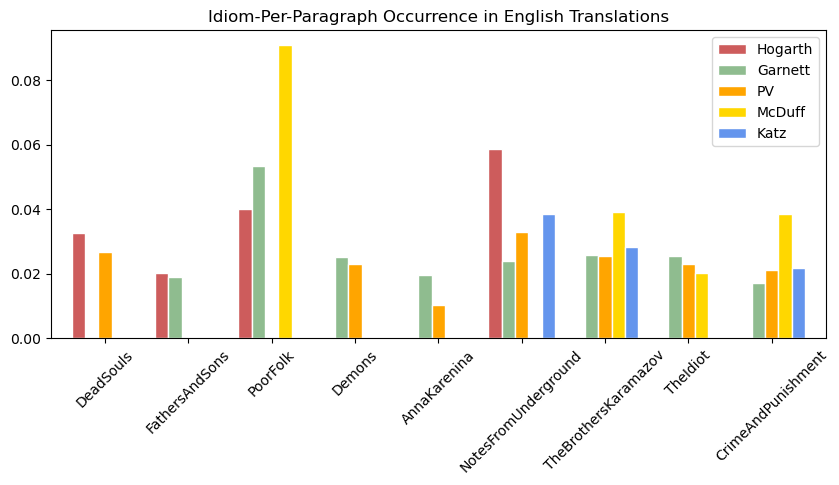

In [75]:
import matplotlib.pyplot as plt

plt.tight_layout()
df.plot(kind='bar',figsize=(10,4), rot=45, title="Idiom-Per-Paragraph Occurrence in English Translations", width = 0.8, color=['indianred', 'darkseagreen', 'orange', 'gold', 'cornflowerblue'], edgecolor='white', fontsize=10)

In [63]:
# en ave idiom ratio: 
total_ratio = 0
for book in source_paragraph_dataset.keys():
        average_idiom_ratio = 0
        count = 0
        for t in book_to_idiom_count_en[book].keys():
                average_idiom_ratio += book_to_idiom_count_en[book][t]
                if book_to_idiom_count_en[book][t]>0:
                        count += 1
        print(book, ': ', average_idiom_ratio/count)
        total_ratio += average_idiom_ratio/count
print('Totat: ', total_ratio/len(source_paragraph_dataset.keys()))


DeadSouls :  0.029655172413793104
FathersAndSons :  0.019574673755437408
PoorFolk :  0.06149732620320856
Demons :  0.024136615149780577
AnnaKarenina :  0.014948256036795707
NotesFromUnderground :  0.03853211009174312
TheBrothersKaramazov :  0.0296539600296077
TheIdiot :  0.0229097605893186
CrimeAndPunishment :  0.02461478192739619
Totat:  0.029502517355231215


In [15]:
book_to_idiom_count_ru = {}

for b in list(source_paragraph_dataset.keys()):
    book_to_idiom_count_ru[b] = 0
    
for id in random.sample(ru_idioms, 500):
    for book in sorted(list(source_paragraph_dataset.keys())):
        num_pars = len(source_paragraph_dataset[book])
        for i in range(num_pars):
            # id needs to be less than par
            par = source_paragraph_dataset[book][i]
            sents = sent_tokenize(par)
            for s in sents:
                if len(s) > 10 and len(id.split(' ')) > 0 and len(id) < len(s):
                    fuzzy = fuzz.partial_ratio(id, s.lower())
                    if fuzzy > 90:
                        book_to_idiom_count_ru[book] += 1

In [16]:
book_to_idiom_count_ru

{'DeadSouls': 62,
 'FathersAndSons': 23,
 'PoorFolk': 29,
 'Demons': 74,
 'AnnaKarenina': 80,
 'NotesFromUnderground': 16,
 'TheBrothersKaramazov': 117,
 'TheIdiot': 112,
 'CrimeAndPunishment': 71}

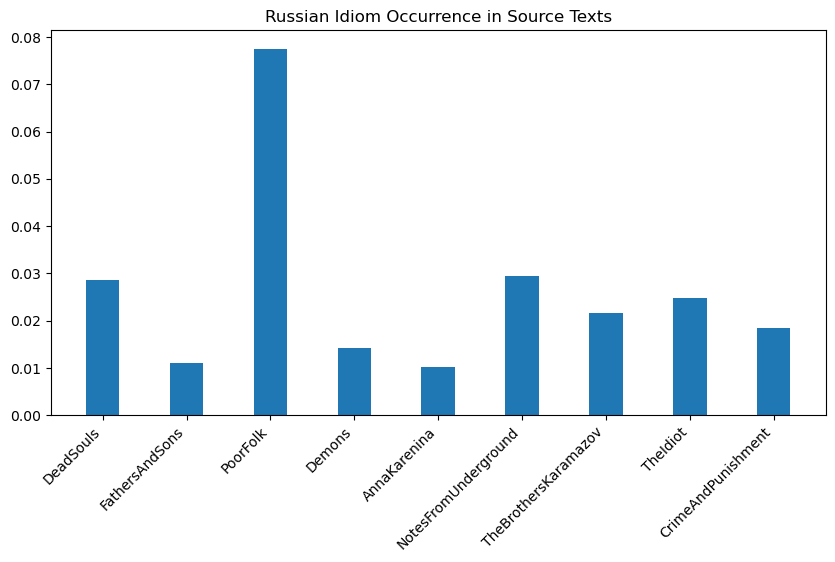

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt


books = list(book_to_idiom_count_ru.keys())
counts = []
for b in books:
    len_book = len(aligned_paragraph_dataset[b])
    counts.append(book_to_idiom_count_ru[b]/len_book)
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(books, counts, width = 0.4)
plt.title("Russian Idiom Occurrence in Source Texts")
plt.xticks(rotation=45, ha="right")
plt.show()
plt.tight_layout()
plt.savefig('/home/kkatsy/litMT/ru_idiom_hist.png')

In [18]:
book_to_idiom_count_dost = {}

for b in list(source_paragraph_dataset.keys()):
    book_to_idiom_count_dost[b] = 0
    
for id in random.sample(dost_idioms, 500):
    for book in sorted(list(source_paragraph_dataset.keys())):
        num_pars = len(source_paragraph_dataset[book])
        for i in range(num_pars):
            # id needs to be less than par
            par = source_paragraph_dataset[book][i]
            sents = sent_tokenize(par)
            for s in sents:
                if len(s) > 10 and len(id.split(' ')) > 0 and len(id) < len(s):
                    fuzzy = fuzz.partial_ratio(id, s.lower())
                    if fuzzy > 90:
                        book_to_idiom_count_dost[book] += 1

In [21]:
book_to_idiom_count_dost

{'DeadSouls': 222,
 'FathersAndSons': 53,
 'PoorFolk': 99,
 'Demons': 448,
 'AnnaKarenina': 251,
 'NotesFromUnderground': 102,
 'TheBrothersKaramazov': 560,
 'TheIdiot': 507,
 'CrimeAndPunishment': 623}

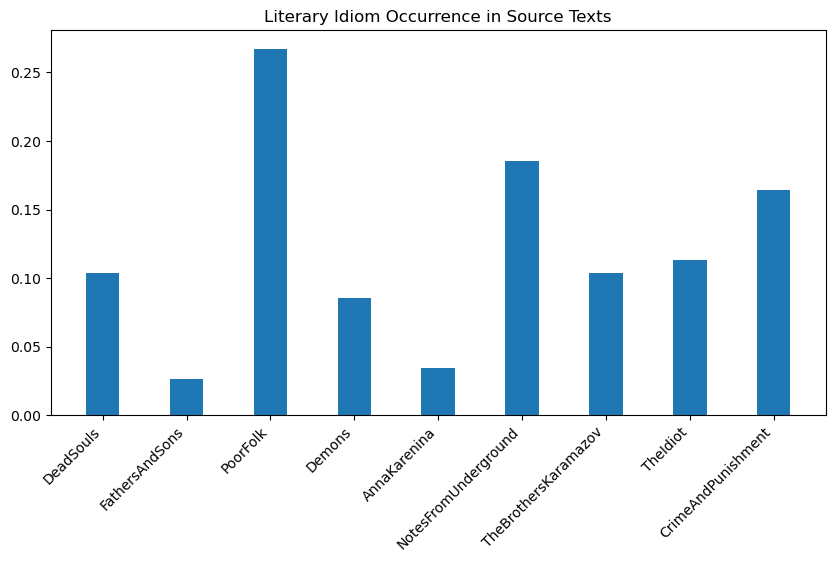

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

books = list(book_to_idiom_count_dost.keys())
counts = []
for b in books:
    len_book = len(aligned_paragraph_dataset[b])
    counts.append(book_to_idiom_count_dost[b]/len_book)
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(books, counts, width = 0.4)
plt.title("Literary Idiom Occurrence in Source Texts")
plt.xticks(rotation=45, ha="right")
plt.show()
plt.tight_layout()
plt.savefig('/home/kkatsy/litMT/dost_idiom_hist.png')

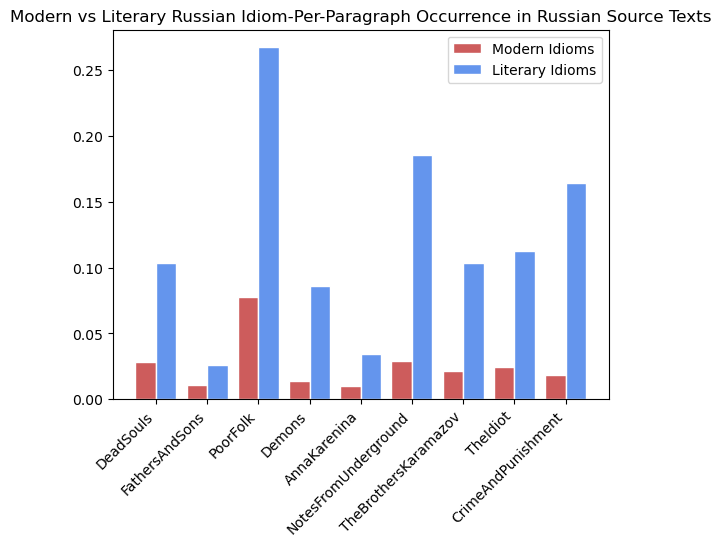

In [77]:
books = list(book_to_idiom_count_ru.keys())
ru_counts = []
dost_counts = []
for b in books:
    len_book = len(aligned_paragraph_dataset[b])
    ru_counts.append(book_to_idiom_count_ru[b]/len_book)
    dost_counts.append(book_to_idiom_count_dost[b]/len_book)
    
X_axis = np.arange(len(books))
  
plt.bar(X_axis - 0.2, ru_counts, 0.4, label = 'Modern Idioms', color='indianred', edgecolor='white') 
plt.bar(X_axis + 0.2, dost_counts, 0.4, label = 'Literary Idioms', color='cornflowerblue', edgecolor='white') 
  
plt.xticks(X_axis, books) 
plt.xticks(rotation=45, ha="right")
plt.title("Modern vs Literary Russian Idiom-Per-Paragraph Occurrence in Russian Source Texts") 
plt.legend() 
plt.tight_layout
plt.show() 

In [67]:
# ru ave idiom ratio: 

total_ratio = 0

for r, b in zip(ru_counts, books):
    idiom_ratio = r
    total_ratio += idiom_ratio
    print(b, ': ', idiom_ratio)
print('Total: ', total_ratio/len(source_paragraph_dataset.keys()))
    

DeadSouls :  0.028505747126436783
FathersAndSons :  0.011116481391976801
PoorFolk :  0.07754010695187166
Demons :  0.014119442854417096
AnnaKarenina :  0.010221029768749201
NotesFromUnderground :  0.029357798165137616
TheBrothersKaramazov :  0.02165062916358253
TheIdiot :  0.024751381215469614
CrimeAndPunishment :  0.01854270044398015
Total:  0.026200590786846827


In [68]:
# dost ave idiom ratio

total_ratio = 0

for r, b in zip(dost_counts, books):
    idiom_ratio = r
    total_ratio += idiom_ratio
    print(b, ': ', idiom_ratio)
print('Total: ', total_ratio/len(source_paragraph_dataset.keys()))

DeadSouls :  0.10344827586206896
FathersAndSons :  0.02609956500724988
PoorFolk :  0.26737967914438504
Demons :  0.08586147681740126
AnnaKarenina :  0.034240449725309825
NotesFromUnderground :  0.1853211009174312
TheBrothersKaramazov :  0.1038119911176906
TheIdiot :  0.1129281767955801
CrimeAndPunishment :  0.164272656045965
Total:  0.1203737079370091


## Idiom Translation Cherry-picking

In [17]:
count = 0
for id in random.sample(dost_idioms, 100):
    for book in sorted(list(source_paragraph_dataset.keys())):
        num_pars = len(source_paragraph_dataset[book])
        for i in range(num_pars):
            # id needs to be less than par
            par = source_paragraph_dataset[book][i]
            sents = sent_tokenize(par)
            for s in sents:
                if len(s) > 10 and len(id.split(' ')) > 0 and len(id) < len(s):
                    fuzzy = fuzz.partial_ratio(id, s.lower())
                    if fuzzy > 90:
                        count +=1
                        print('Num ', count)
                        print('score: ', fuzzy)
                        print('idiom: ', id)
                        print('sent: ', s)
                        
                        source = source_paragraph_dataset[book][i]
                        print('source: ', source)
                        target_keys = aligned_paragraph_dataset[book][i]
                        for t in target_keys:
                            print(t, ': ', aligned_paragraph_dataset[book][i][t])
                            
                        print('book: ', book, ', par idx: ', i, '\n')

Num  1
score:  94
idiom:  был да весь вышел
sent:  Был, да весь вышел!
source:  – Хорошо. Я вот бы как поступил, – начал Раскольников, опять вдруг приближая свое лицо к лицу Заметова, опять в упор смотря на него и говоря опять шепотом, так что тот даже вздрогнул на этот раз. – Я бы вот как сделал: я бы взял деньги и вещи и, как ушел бы оттуда, тотчас, не заходя никуда, пошел бы куда-нибудь, где место глухое и только заборы одни, и почти нет никого, – огород какой-нибудь или в этом роде. Наглядел бы я там еще прежде, на этом дворе, какой-нибудь такой камень этак в пуд или полтора весу, где-нибудь в углу, у забора, что с построения дома, может, лежит; приподнял бы этот камень – под ним ямка должна быть, – да в ямку-то эту все бы вещи и деньги и сложил. Сложил бы, да и навалил бы камнем, в том виде, как он прежде лежал, придавил бы ногой, да и пошел бы прочь. Да год бы, два бы не брал, три бы не брал, – ну, и ищите! Был, да весь вышел!
Katz :  "All right.
Garnett :  There'd be no trace."


In [18]:
find_idioms = ['кровь с молоком', 'оборот медали', 'учиться на медные деньги']
count = 0
for id in find_idioms:
    for book in sorted(list(source_paragraph_dataset.keys())):
        num_pars = len(source_paragraph_dataset[book])
        for i in range(num_pars):
            # id needs to be less than par
            par = source_paragraph_dataset[book][i]
            sents = sent_tokenize(par)
            for s in sents:
                if len(s) > 10 and len(id.split(' ')) > 0 and len(id) < len(s):
                    fuzzy = fuzz.partial_ratio(id, s.lower())
                    if fuzzy > 90:
                        count +=1
                        print('Num ', count)
                        print('score: ', fuzzy)
                        print('idiom: ', id)
                        print('sent: ', s)
                        
                        source = source_paragraph_dataset[book][i]
                        print('source:')
                        print(source)
                        target_keys = aligned_paragraph_dataset[book][i]
                        for t in target_keys:
                            print(t, ': ', aligned_paragraph_dataset[book][i][t])
                            
                        print('book: ', book, ', par idx: ', i, '\n')

Num  1
score:  100
idiom:  кровь с молоком
sent:  Господин этот был лет тридцати, плотный, жирный, кровь с молоком, с розовыми губами и с усиками и очень щеголевато одетый.
source:
Раскольников не сел и уйти не хотел, а стоял перед нею в недоумении. Этот бульвар и всегда стоит пустынный, теперь же, во втором часу и в такой зной, никого почти не было. И, однако ж, в стороне, шагах в пятнадцати, на краю бульвара, остановился один господин, которому, по всему видно было, очень бы хотелось тоже подойти к девочке с какими-то целями. Он тоже, вероятно, увидел ее издали и догонял, но ему помешал Раскольников. Он бросал на него злобные взгляды, стараясь, впрочем, чтобы тот их не заметил, и нетерпеливо ожидал своей очереди, когда досадный оборванец уйдет. Дело было понятное. Господин этот был лет тридцати, плотный, жирный, кровь с молоком, с розовыми губами и с усиками и очень щеголевато одетый. Раскольников ужасно разозлился; ему вдруг захотелось как-нибудь оскорбить этого жирного франта. Он н

In [ ]:
idx = 2519
book = 'CrimeAndPunishment'
idiom = 'время терпят'

target_keys = aligned_paragraph_dataset[book][idx]
source = source_paragraph_dataset[book][idx]

print('Source:')
print(source)
print('Translations:')
for t in target_keys:
    print(t, ': ', aligned_paragraph_dataset[book][idx][t])